<a href="https://colab.research.google.com/github/kilianBertholon/Apprentissage-profond/blob/main/Partie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Rendu Projet Apprentissage Profond </center>

In [1]:
!git clone https://github.com/kilianBertholon/Apprentissage-profond.git

Cloning into 'Apprentissage-profond'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 53 (delta 8), reused 7 (delta 1), pack-reused 32
Receiving objects: 100% (53/53), 106.33 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (31/31), done.


Kilian Bertholon  
Guillaume Cobat  
Placé Anthony

In [2]:
import csv
import os
import json
import numpy as np

def load_data(nom_dossier="."):
    """
    Fonction de chargement des données
    Attention : Utilise les librairies csv et json. S'assurer que le répertoire de travail est celui où se trouve
    la fonction data_loading.py (sans déplacer les différents fichiers)
    """

    info_obs = {}
    users = []

    print("-- chargement des fichiers csv (observations + labels) --")
    dataset = []
    user_ids = []
    labels = []
    for dir_files in os.listdir(nom_dossier):
        if os.path.isfile(nom_dossier + "/" + dir_files) and dir_files[-3:]=='csv':
            user_id = dir_files.split('_')[0]
            print("Data ", user_id)
            users.append(user_id)
            cur_series = []
            cur_labels = []
            with open(nom_dossier + "/" + dir_files, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='\'')
                for i,row in enumerate(spamreader):
                    if i==0:
                        info_obs['observations'] = row[2:5]
                        info_obs['labels'] = row[7]
                    else:
                        cur_series.append([float(v) for v in row[2:5]])
                        cur_labels.append(row[7])
            segmented_series = []
            segmented_labels = []
            cur_lab = "not_labeled"
            cur_ser = []
            for i, (v, l) in enumerate(zip(cur_series, cur_labels)):
                if l != cur_lab:
                    if cur_lab != "not_labeled":
                        segmented_series.append(np.array(cur_ser))
                        segmented_labels.append(cur_lab)
                    cur_ser = []
                    cur_lab = l
                if l != "not_labeled":
                    cur_ser.append(v)
        dataset.extend(segmented_series)
        labels.extend(segmented_labels)
        user_ids.extend([user_id] * len(segmented_series))


    print("-- chargement du fichier json (meta données) --")
    # Opening JSON file
    f = open(os.path.join(nom_dossier, 'meta.json'))
    # returns JSON object as a dictionary
    tmp_meta_data = json.load(f)
    meta_data = {}
    for origin in tmp_meta_data:
        for user_id, user_info in tmp_meta_data[origin].items():
            meta_data[user_id] = user_info
            meta_data[user_id]['origin'] = origin
    # Closing file
    f.close()

    return dataset, labels, user_ids  # info_obs, meta_data

print("Lecture des données")
data_obs, data_labels, user_ids = load_data("Apprentissage-profond/hangtime_har/")
print("Données chargées")

print(data_obs[:5])
print(data_labels[:5])
print(user_ids[:5])

Lecture des données
-- chargement des fichiers csv (observations + labels) --
Data  b512
Data  4991
Data  4d70
Data  c6f3
Data  9bd4
Data  ce9d
Data  f2ad
Data  10f0
Data  2dd9
Data  ce9d
Data  ac59
Data  f2ad
Data  9bd4
Data  e90f
Data  4d70
Data  b512
Data  10f0
Data  0846
Data  a0da
Data  ac59
Data  a0da
Data  2dd9
Data  05d8
Data  0846
-- chargement du fichier json (meta données) --
Données chargées
[array([[-0.59497, -0.50952,  0.68579],
       [-0.56885, -0.51416,  0.67188],
       [-0.53784, -0.50488,  0.68774],
       ...,
       [ 0.90576, -1.27222,  1.09424],
       [ 0.64233, -2.0415 ,  2.09741],
       [ 1.06958, -2.59253,  1.89355]]), array([[ 1.72534 , -2.29004 ,  0.01855 ],
       [ 3.06958 , -0.95239 , -2.04224 ],
       [ 4.29956 , -0.24341 , -3.25122 ],
       [ 4.64771 , -2.18604 , -2.67261 ],
       [ 4.2373  , -6.09033 ,  1.81958 ],
       [ 5.62695 , -2.33081 ,  3.06079 ],
       [ 5.57202 ,  3.4751  ,  0.55103 ],
       [ 1.396   ,  3.16943 , -1.00342 ],
       [

## Création d'un jeu de données de test et d'un jeu d'entrainement

Dans un premier temps, on va se charger de séparer nos données en un jeu d'entrainement et un jeu de test. Pour ce faire, on va séparer chacun des tests de chacun des individus en gardant 80 % des tests de chacun des individus comme des données d'entrainements et 20 % restants comme des données de test

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

unique_users = list(set(user_ids))

data_obs_train = []
data_obs_test = []
data_labels_train = []
data_labels_test = []
user_ids_train = []
user_ids_test = []

#Pour chaque utilisateur, on sépare les données en train et test
for user in unique_users:
    #Extraire les indices correspondant à l'utilisateur
    indices_user = [i for i, u_id in enumerate(user_ids) if u_id == user]

    #Diviser les indices en train et test
    indices_train, indices_test = train_test_split(indices_user, test_size=0.1, random_state=42)

    #Ajouter les données d'entrainements
    data_obs_train.extend([data_obs[i] for i in indices_train])
    data_labels_train.extend([data_labels[i] for i in indices_train])
    user_ids_train.extend([user_ids[i] for i in indices_train])

    #Ajouter les données de test
    data_obs_test.extend([data_obs[i] for i in indices_test])
    data_labels_test.extend([data_labels[i] for i in indices_test])
    user_ids_test.extend([user_ids[i] for i in indices_test])

Analyse du nombre de classes de y dans le jeu de test et dans le jeu d'apprentissage :

In [4]:
print('Il y a ', len(np.unique(data_labels_train)), ' classes dans les données d\'entraînement')
print('Il y a ', len(np.unique(data_labels_test)), ' classes dans les données de test')
print('Il y a ', len(np.unique(data_labels)), ' classes dans les données totales')

print('dif label en entrainement : ', np.unique(data_labels_train))
print('dif label en test : ',np.unique(data_labels_test))
print('dif label au total : ',np.unique(data_labels))

Il y a  5  classes dans les données d'entraînement
Il y a  5  classes dans les données de test
Il y a  5  classes dans les données totales
dif label en entrainement :  ['jumping' 'running' 'sitting' 'standing' 'walking']
dif label en test :  ['jumping' 'running' 'sitting' 'standing' 'walking']
dif label au total :  ['jumping' 'running' 'sitting' 'standing' 'walking']


Les labels sont bien les mêmes dans les jeux d'entrainements et de tests et correspondent bien à ceux du jeu de base

## Normalisation des données

In [5]:
#essai 2
from sklearn.preprocessing import StandardScaler

data_obs_train_concatenated = np.concatenate(data_obs_train)
data_obs_test_concatenated = np.concatenate(data_obs_test)

# Initialiser le scaler
scaler = StandardScaler()

# Adapter le scaler sur l'ensemble du jeu de données (entraînement + test)
scaler.fit(np.concatenate([data_obs_train_concatenated, data_obs_test_concatenated]))

# Appliquer la transformation sur toutes les séquences d'entraînement et de test
data_obs_train_Norm = [scaler.transform(obs) for obs in data_obs_train]
data_obs_test_Norm = [scaler.transform(obs) for obs in data_obs_test]

## Longueur de chaque série temporelle

Dans notre cas, il serait préférables d'avoir des séquences de tailles identiques ( plus simple pour la convergence des informations)  
On va donc chercher à rajouter du padding (séries de 0 pour complémenter le manque d elongueur sur certaines séquences) ou a réaliser du troncage (garder uniquement la partie la plus importante de chaque série pour obtenir des informations de même taille)

In [6]:
num_sequences = len(data_obs_train_Norm)

# Afficher la longueur de chaque séquence
for i in range(min(5,num_sequences)):
    print(f"Longueur de la séquence {i + 1}: {len(data_obs_train[i])}")

Longueur de la séquence 1: 2267
Longueur de la séquence 2: 322
Longueur de la séquence 3: 1930
Longueur de la séquence 4: 58
Longueur de la séquence 5: 151


#### Jeu de données d'entrainement

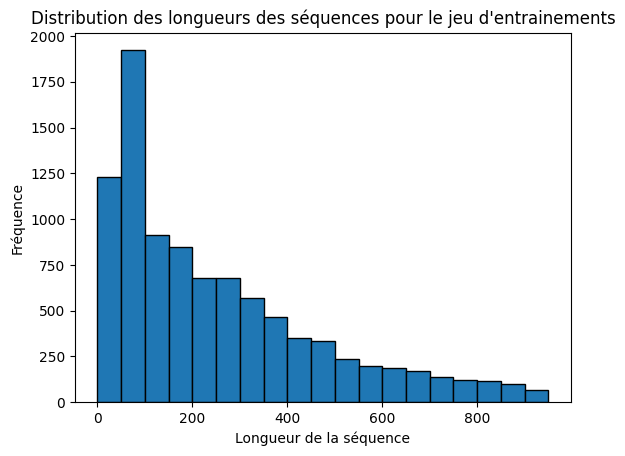

Longueur minimale : 1
Longueur maximale : 46004
Longueur moyenne : 488.3216591665036


In [7]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque séquence
sequence_lengths = [len(seq) for seq in data_obs_train]

bins = np.arange(0, 1000, 50)
# Afficher un histogramme
plt.hist(sequence_lengths, bins=bins, edgecolor='black')
plt.title('Distribution des longueurs des séquences pour le jeu d\'entrainements')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.show()

min_length = min(sequence_lengths)
max_length = max(sequence_lengths)
mean_length = np.mean(sequence_lengths)

print(f"Longueur minimale : {min_length}")
print(f"Longueur maximale : {max_length}")
print(f"Longueur moyenne : {mean_length}")

#### Jeu de données de test

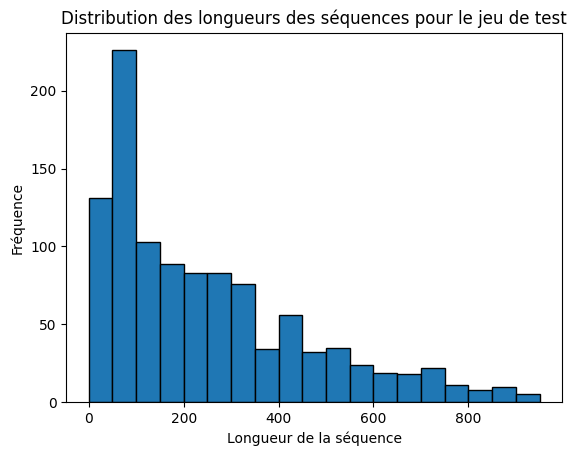

Longueur minimale : 14
Longueur maximale : 11820
Longueur moyenne : 416.8243006993007


In [8]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque séquence
sequence_lengths = [len(seq) for seq in data_obs_test]

bins = np.arange(0, 1000, 50)
# Afficher un histogramme
plt.hist(sequence_lengths, bins=bins, edgecolor='black')
plt.title('Distribution des longueurs des séquences pour le jeu de test')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.show()

min_length = min(sequence_lengths)
max_length = max(sequence_lengths)
mean_length = np.mean(sequence_lengths)

print(f"Longueur minimale : {min_length}")
print(f"Longueur maximale : {max_length}")
print(f"Longueur moyenne : {mean_length}")

Pour être sur de ne pas se tromper on va créer les deux manières et on comparera pour chacun des test les deux manières de faire

### Data augmentation

Etant donné que l'algorithme a des difficultés pour identifier sitting et standing dû au fait que ces variables sont sous représentées, nous souhaitons augmenter le poids de ces variables pour améliorer la classification

In [9]:
# Fonction pour ajouter du jitter à chaque valeur d'accélération
def add_jitter_to_data(data, factor=0.05):
    jitter = factor * np.random.normal(size=data.shape)
    return data + jitter

#-----------------------------SITTING--------------------------------------------------------------

# Utiliser une liste en compréhension pour obtenir les indices avec le label "sitting"
indices_sitting = [i for i, label in enumerate(data_labels_train) if label == "sitting"]

# Extraire les lignes associées au label "sitting" dans data_obs_train
data_obs_train_sitting = [data_obs_train_Norm[i] for i in indices_sitting]
data_labels_train_sitting = [data_labels_train[i] for i in indices_sitting]

# Créer un tableau pour stocker les données augmentées
augmented_data_sitting = []


# Appliquer la data augmentation jitter
for j in range(50): #Fais 10 fois un tour de boucle pour rajouter du random sur les 42 valeurs
  for i in range(len(data_obs_train_sitting)):
      augmented_data_sitting.append(add_jitter_to_data(data_obs_train_sitting[i]))

# on copie le dataset data_obs_train et data_labels_train pour pouvoir les comparer plus tard avvec les poids
data_obs_train_augmented_Norm = data_obs_train_Norm
data_labels_train_augmented = data_labels_train

data_obs_train_augmented_Norm.extend(augmented_data_sitting)
#print(augmented_data_sitting)

label_a_ajouter = "sitting"

# Ajouter 420 occurrences du label "sitting" à la fin de la liste
data_labels_train_augmented.extend([label_a_ajouter] * len(augmented_data_sitting))

#-----------------------------SITTING--------------------------------------------------------------

#----------------------------STANDING--------------------------------------------------------------

# Utiliser une liste en compréhension pour obtenir les indices avec le label "standing"
indices_standing = [i for i, label in enumerate(data_labels_train_augmented) if label == "standing"]

# Extraire les lignes associées au label "sitting" dans data_obs_train
data_obs_train_standing = [data_obs_train_augmented_Norm[i] for i in indices_standing]
data_labels_train_standing = [data_labels_train_augmented[i] for i in indices_standing]

# Créer un tableau pour stocker les données augmentées
augmented_data_standing = []


# Appliquer la data augmentation jitter
for j in range(2): #Fais 10 fois un tour de boucle pour rajouter du random sur les 42 valeurs
  for i in range(len(data_obs_train_standing)):
      augmented_data_standing.append(add_jitter_to_data(data_obs_train_standing[i]))



data_obs_train_augmented_Norm.extend(augmented_data_standing)
#print(augmented_data_sitting)

label_a_ajouter_2 = "standing"

# Ajouter 420 occurrences du label "sitting" à la fin de la liste
data_labels_train_augmented.extend([label_a_ajouter_2] * len(augmented_data_standing))

#--------------------------------------------------------------------------------------------

# Utiliser un dictionnaire pour stocker le nombre d'occurrences de chaque label
occurrences = {}

# Compter le nombre d'occurrences pour chaque label
for label in data_labels_train_augmented:
    occurrences[label] = occurrences.get(label, 0) + 1

# Afficher le nombre d'occurrences pour chaque label
for label, count in occurrences.items():
    print(f"Label '{label}': {count} occurrence(s)")

Label 'walking': 3585 occurrence(s)
Label 'running': 3522 occurrence(s)
Label 'jumping': 2152 occurrence(s)
Label 'standing': 2724 occurrence(s)
Label 'sitting': 2805 occurrence(s)


## Padding

Test avec padding = 1000 (au dessus très peu d'actions sont plus longue et cela accentue nettemment le temps de traitement)

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_obs_train_Norm_pad = []
data_obs_train_Norm_pad = pad_sequences(data_obs_train_Norm, maxlen=600, padding='post', dtype='float32')
data_obs_train_augmented_Norm_pad = [] # data augmentation
data_obs_train_augmented_Norm_pad = pad_sequences(data_obs_train_augmented_Norm, maxlen=600, padding='post', dtype='float32') #data augmentation

data_obs_test_Norm_pad = []
data_obs_test_Norm_pad = pad_sequences(data_obs_test_Norm, maxlen=600, padding='post', dtype='float32')



## Encodage des labels

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Encoder les labels en entiers
labels_encoder = LabelEncoder()
labels_train_int = labels_encoder.fit_transform(data_labels_train)
labels_train_int_augmented = labels_encoder.fit_transform(data_labels_train_augmented) #data augmentation
labels_test_int = labels_encoder.fit_transform(data_labels_test)

#Encoder les labels en one-hot
labels_onehot = OneHotEncoder(sparse=False, categories='auto')
labels_train_onehot = labels_onehot.fit_transform(labels_train_int.reshape(-1, 1))
labels_train_onehot_augmented = labels_onehot.fit_transform(labels_train_int_augmented.reshape(-1, 1)) #data augmentation
labels_test_onehot = labels_onehot.fit_transform(labels_test_int.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Application de poids aux variables

Cela consiste à réaliser exactement la même chose que la data augmentation, mais de manière plus simple en attribuant directement un poids aux différentes variables

In [12]:
def get_custom_sample_weight(y):
    """Return custom sample weights."""
    y = np.asarray(y)

    # Définir les poids personnalisés pour chaque classe
    class_weights = {0: 1.0, 1: 1.0, 2: 10.0, 3: 10.0, 4: 1.0}  # Modifiez selon vos besoins

    sample_weight = []

    for label in y:
        idx, *__ = np.where(label == 1)
        sample_weight += [max([class_weights[i] for i in idx])]

    return np.array(sample_weight)

# Utilisation de la fonction pour obtenir les poids personnalisés
custom_sample_weights = get_custom_sample_weight(labels_train_onehot)

# Convertir les étiquettes one-hot en noms d'étiquettes
class_labels = ['jumping', 'running', 'sitting', 'standing', 'walking']
predicted_labels = [class_labels[np.argmax(label)] for label in labels_train_onehot]

# Convertir les étiquettes one-hot en indices de classe
class_indices = np.argmax(labels_train_onehot, axis=1)

# Initialiser un dictionnaire pour stocker un exemple pour chaque classe
examples_by_class = {class_label: None for class_label in set(class_indices)}

# Parcourir les exemples et remplir le dictionnaire
for i, class_index in enumerate(class_indices):
    if examples_by_class[class_index] is None:
        examples_by_class[class_index] = i

# Afficher un exemple pour chaque classe
for class_label, example_index in examples_by_class.items():
    print(f"Classe {class_label}: Poids = {custom_sample_weights[example_index]}")
    print(f"   Exemple {example_index + 1} : {labels_train_onehot[example_index]}")
    print(f"   Label: {predicted_labels[example_index]}")

Classe 0: Poids = 1.0
   Exemple 4 : [1. 0. 0. 0. 0.]
   Label: jumping
Classe 1: Poids = 1.0
   Exemple 2 : [0. 1. 0. 0. 0.]
   Label: running
Classe 2: Poids = 10.0
   Exemple 104 : [0. 0. 1. 0. 0.]
   Label: sitting
Classe 3: Poids = 10.0
   Exemple 26 : [0. 0. 0. 1. 0.]
   Label: standing
Classe 4: Poids = 1.0
   Exemple 1 : [0. 0. 0. 0. 1.]
   Label: walking


## Modèle à tester et comparer

##### Avec Padding  
  
1. RNN
2. CNN
3. CNN 1D

##### Sans Padding  
  
1. CNN avec GAP  
2. Réseau de neurones Transformer  
3. Réseaux de neurones Attention  
4. Réseaux de neurones Hybrides  


### Réseau RNN

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten, Input
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, restore_best_weights=True, verbose=2)


def model_rnn_basique(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = SimpleRNN(64)(input)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model


In [16]:
model_rnn = model_rnn_basique(600, 3, 5)

data_obs_train_Norm_pad.shape

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 600, 3)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                4352      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4677 (18.27 KB)
Trainable params: 4677 (18.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(14788, 600, 3)

In [17]:
history_rnn = model_rnn.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=500, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Epoch 1/10
30/30 [==============================] - 35s 1s/step - loss: 1.5352 - accuracy: 0.3200 - val_loss: 1.4661 - val_accuracy: 0.3540
Epoch 2/10
30/30 [==============================] - 28s 963ms/step - loss: 1.5042 - accuracy: 0.3549 - val_loss: 1.4522 - val_accuracy: 0.3549
Epoch 3/10
30/30 [==============================] - 24s 811ms/step - loss: 1.4365 - accuracy: 0.3813 - val_loss: 1.4418 - val_accuracy: 0.3453
Epoch 4/10
30/30 [==============================] - 17s 563ms/step - loss: 1.4004 - accuracy: 0.3911 - val_loss: 1.4703 - val_accuracy: 0.3435
Epoch 5/10
30/30 [==============================] - 17s 581ms/step - loss: 1.4019 - accuracy: 0.3878 - val_loss: 1.4208 - val_accuracy: 0.3558
Epoch 6/10
30/30 [==============================] - 18s 586ms/step - loss: 1.3737 - accuracy: 0.3961 - val_loss: 1.4233 - val_accuracy: 0.3575
Epoch 7/10
30/30 [==============================] - 17s 570ms/step - loss: 1.3486 - accuracy: 0.3969 - val_loss: 1.4259 - val_accuracy: 0.3566
Ep

### Réseau RNN avancé

In [18]:
def model_rnn_avance(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = SimpleRNN(64, return_sequences=True)(input)
  Couche_rec2 = SimpleRNN(32)(Couche_rec)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec2)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model



In [19]:
model_rnn_avance = model_rnn_avance(600, 3, 5)
history_rnn_avance = model_rnn_avance.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=256, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 600, 3)]          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 600, 64)           4352      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 7621 (29.77 KB)
Trainable params: 7621 (29.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
58/58 [==============================] - 38s 617ms/step - loss: 1.4533 - accuracy: 0.3458 - val_loss: 1.4737 - val_accuracy: 0.3383
Epoch 2/10
58/

### Modèle LTSM

In [20]:
# Definition du modèle
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Flatten
def model_lstm(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = LSTM(64, return_sequences=True)(input)
  Couche_rec2 = LSTM(32)(Couche_rec)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec2)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [ ]:
model_lstm = model_lstm(600, 3, 5)
history_lstm = model_lstm.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=256, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

### LSTM Bidirectionnal


In [21]:
# Definition du modèle
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Flatten, Bidirectional
def model_lstm_bidi(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = Bidirectional(LSTM(128, return_sequences=True))(input)
  Couche_rec2 = Bidirectional(LSTM(128, return_sequences = True))(Couche_rec)
  Couche_rec3 = Bidirectional(LSTM(64, return_sequences = True))(Couche_rec2)
  Couche_rec4 = Bidirectional(LSTM(64, return_sequences = True))(Couche_rec3)
  Flatten1 = Flatten()(Couche_rec4)
  dense1 = Dense(32, activation = "relu")(Flatten1)
  dense2 = Dense(nb_classes, activation = "softmax")(dense1)
  model = Model(inputs=input, outputs=dense2)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [22]:
model_lstm_bidi = model_lstm_bidi(600, 3, 5)
history_lstm_bidi = model_lstm_bidi.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=256, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 600, 3)]          0         
                                                                 
 bidirectional (Bidirection  (None, 600, 256)          135168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 600, 256)          394240    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 600, 128)          164352    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 600, 128)          98816     
 onal)                                                     

KeyboardInterrupt: ignored

### CNN


Nous réaliserons la comparaison entre la data augmentation et l'augmentation du poids des variables sur ce modèle, car il affiche de meilleurs résultats que ces concurrents

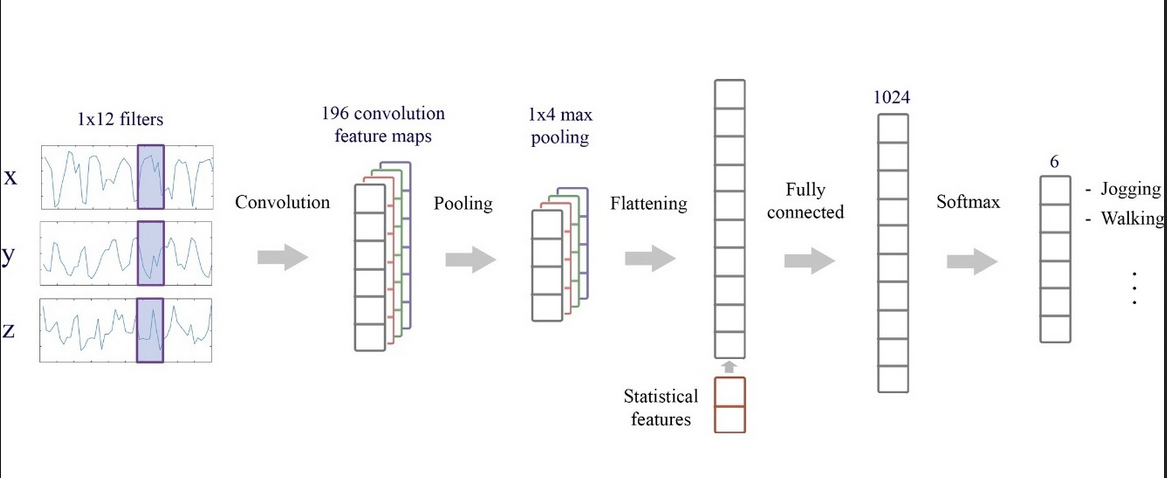

In [ ]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Flatten, Bidirectional, InputLayer, Conv1D, Conv2D, MaxPool2D, MaxPooling1D, Masking
from tensorflow.keras.models import Sequential, Model
from keras.callbacks import EarlyStopping


cb = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, restore_best_weights=True, verbose=2)

def cnn_model(T, D, nb_classes):
  model = Sequential([
      InputLayer(input_shape = (T, D, 1)),
      Conv2D(filters=196, kernel_size= (12, 1), strides=1, padding='same', activation='relu'),
      MaxPool2D(pool_size=(1, 4), strides=1, padding='same'),
      Flatten(),
      Dense(units=nb_classes, activation='softmax')
  ])
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [ ]:
#etant donné que c'est le modèle le plus performant, nous allons tester le modèle avec les données augmentées et avec les poids

model_cnn = cnn_model(600, 3, 5)
history_cnn = model_cnn.fit(data_obs_train_augmented_Norm_pad, labels_train_onehot_augmented, epochs=10, batch_size=256, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

In [ ]:
model_cnn_poids = cnn_model(600, 3, 5)
history_cnn_poids = model_cnn_poids.fit(data_obs_train_Norm_pad, labels_train_onehot,
                             epochs=10, batch_size=256,
                             validation_data=(data_obs_test_Norm_pad, labels_test_onehot),
                             sample_weight=custom_sample_weights,  # Utilisation des poids personnalisés
                             callbacks=[cb])

LTSM avancée

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

def lstm_avance(T, D, nb_classes):
  model = Sequential()
  model.add(LSTM(units = 128, input_shape = (T, D)))
      # Dropout layer
  model.add(Dropout(0.5))
# Dense layer with ReLu
  model.add(Dense(units = 64, activation='relu'))
# Softmax layer
  model.add(Dense(nb_classes, activation = 'softmax'))
# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
lstm_avance = lstm_avance(600, 3, 5)
history_cnn = lstm_avance.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=256, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

## Graphique de comparaison

In [ ]:
# Visualiser l'évolution de la perte et de la précision au fil des époques
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['val_loss'], label='RNN simple')
plt.plot(history_rnn_avance.history['val_loss'], label='RNN avancé')
plt.plot(history_lstm.history['val_loss'], label='LSTM')
plt.plot(history_lstm_bidi.history['val_loss'], label='LSTM Bidirectionnal')
plt.plot(history_lstm_bidi.history['val_loss'], label='LSTM Bidirectionnal')
plt.title('Validation Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_accuracy'], label='RNN simple')
plt.plot(history_rnn_avance.history['val_accuracy'], label='RNN avancé')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_lstm_bidi.history['val_accuracy'], label='LSTM Bidirectionnal')
plt.title('Validation Accuracy')
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['val_loss'], label='CNN avec data augmentation')
plt.plot(history_cnn_poids.history['val_loss'], label='CNN avec poids')
plt.title('Validation Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['val_accuracy'], label='CNN avec data augmentation')
plt.plot(history_cnn_poids.history['val_accuracy'], label='CNN avec poids')
plt.title('Validation Accuracy')
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Après l'entraînement du modèle
y_pred = model_cnn.predict(data_obs_test_Norm_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(labels_test_onehot, axis=1)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

class_names = np.unique(data_labels)


# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

# Calcul et affichage de la précision globale
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Précision globale : {accuracy * 100:.2f}%")